In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
pd.__version__

'0.22.0'

## inputdata 
for each day:
x = the sum of the 5 securities with the highest increase + the sum of the 5 securities with the worst decrease

In [0]:
inputdata = 'inputdata_arima.csv'
path = inputdata
column_names = ['date','values']
df = pd.read_csv(path, header = None,  names = column_names)

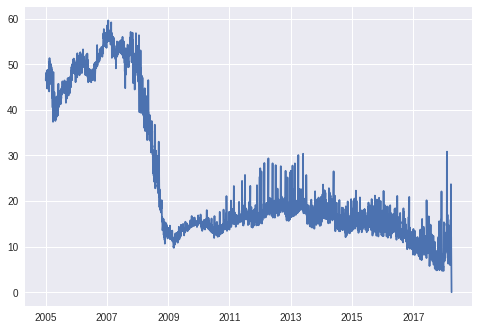

In [5]:
# graph
df['date'] = pd.to_datetime(df['date'])
x = df['date']
y = df['values']
plt.plot(x,y)

In [6]:
# variance
df.var()

values    231.482201
dtype: float64

In [7]:
# standard deviation
df.std()

values    15.214539
dtype: float64

## first differentiation

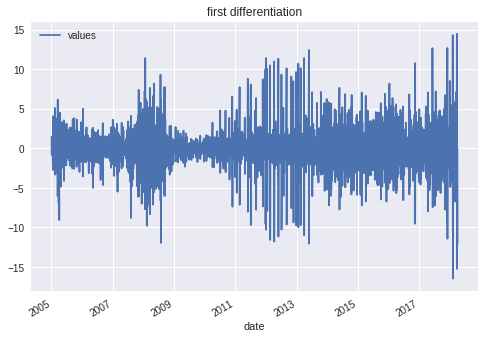

In [9]:
# first differentiation
dfp1 = df.set_index('date')
dfp1 = dfp1.diff()
dfp1.plot(kind='line', grid=True, title='first differentiation')

In [10]:
#std
dfp1.std()

values    2.500456
dtype: float64

***
## second differentiation

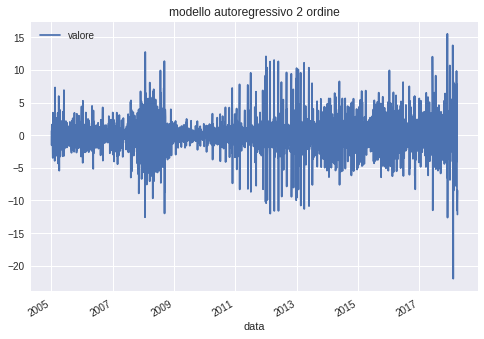

In [0]:
dfp2 = df.set_index('date')
dfp2 = dfp2.diff(periods=2)
dfp2.plot(kind='line', grid=True, title='second differentiation')

In [0]:
dfp2.std()

valore    2.524271
dtype: float64

***
## Sample autocorrelation function (ACF)
To identify the type of process followed by the time series, we initially draw two key functions:

- Sample autocorrelation function (ACF)
- Sample partial autocorrelation function (Partial ACF)

ACF and the Partial ACF allow to examine the correlation between the elements of the time series according to their delays (lag).

By calculating these two functions in relation to the first differentiation of our dataset, it is possible to understand if the time series follows a process:

- moving average (MA)
- autoregressive (AR)
- a two-two combination (autoregressive moving average (ARMA))
- integrated (I)

Below are calculated the ACF applied to the time series (first and second differentiation) according to the delays.

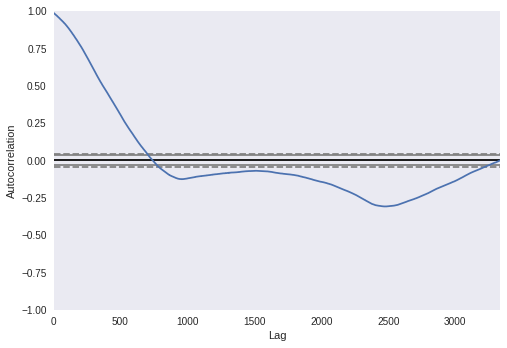

In [11]:
# Autocorrelation from original series
autocorrelation_plot(df['values'])

From the graph there is a positive correlation with the first 400 delays, which correspond to a * significant correlation * of 0.5, 0.6.

***
## ARIMA MODEL

In [14]:
from statsmodels.tsa.arima_model import ARIMA

# setting index su 'date' if give error
#df = df.set_index('date')

# fit model
model = ARIMA(df, order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = dataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.values   No. Observations:                 3335
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -7189.395
Method:                       css-mle   S.D. of innovations              2.089
Date:                Wed, 05 Dec 2018   AIC                          14386.789
Time:                        14:37:28   BIC                          14411.238
Sample:                    01-03-2005   HQIC                         14395.536
                         - 04-03-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0136      0.019     -0.719      0.472      -0.051       0.023
ar.L1.D.values    -0.6302      0.017    -37.914      0.000      -0.663      -0.598
ar.L2.D.values    -0.2848      0.017

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


AttributeError: ignored